# 기본Setting

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

melbourne_file_path = './data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
y = melbourne_data.Price

melbourne_model = DecisionTreeRegressor(random_state=1) # 1. 모델정의
melbourne_model.fit(X, y) # 2. 모델훈련

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X, train_y)

DecisionTreeRegressor()

# Decision tree 파라미터 조절을 통해 다양한 모델을 만들 수 있다.

### 가장 중요한 파라미터는 "depth": 얼마나 split을 많이하여 깊게 내려갈 것인가?
 - 이에 보통 Top에서부터 10split 정도를 실시한다.깊어질수록 더 많은 leaf들이 생긴다.
 - leaf의 수가 많아지면 train data에는 정말 훌륭한 예측을 보여주지만, 오히려 new data가 들어왔을 때 좋지 않을 수 있다. (Overfitting)
 - tree를 그저 2~4번의 split만 실시한다면, 모든 상황을 보여주지 못해 train data에서도 성능이 낮고, new data에서도 성능이 낮아지게 된다.(Underfitting)
 - 우리는 Underfitting과 Overfitting의 sweet spot을 validation data로 탐지 가능

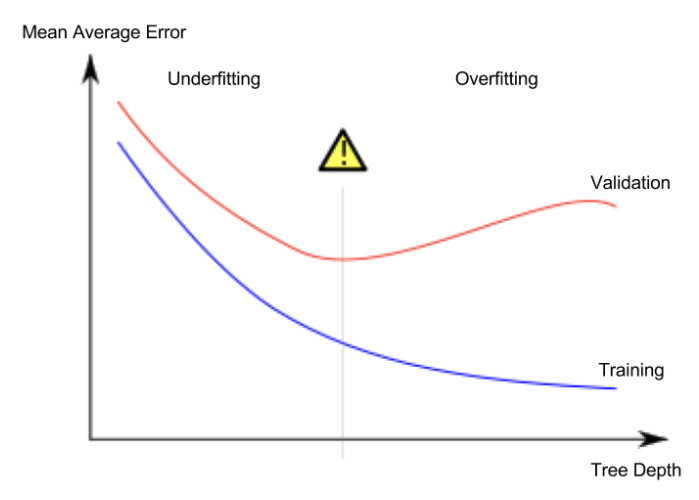

### max_leaf_nodes로 tree depth를 깊게 설정 가능하다. 
 - 이것으로 Overfitting과 Underfitting을 확인해보자.

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [8]:
# max_leaf_nodes 값에 따른 MAE 확인
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  354662
Max leaf nodes: 50  		 Mean Absolute Error:  266447
Max leaf nodes: 500  		 Mean Absolute Error:  231301
Max leaf nodes: 5000  		 Mean Absolute Error:  249163


# 이를 통해 최적의 파라미터 값을 찾았다면 해당 파라미터로 모델을 훈련하자.
 - 단, 이때 모델의 정확도를 올리기 위해 Valid data를 Train에 합쳐서 학습시키는 것은 바람직하다.
 - 즉, validation data의 목적은 최적의 모델의 선정인데, 이미 최적의 모델을 선정했기에 validation data의 역할이 없어졌기 때문이다. (더이상 검증의 필요가 없다.)
##### Validation data가 들어감으로써 모델이 왜곡되는 것은 없을까..? Validation data 삽입 이전과 후가 Model Complexity가 아닐수도 있는데..!